# Домашнее задание
## Harry Potter and the Action Prediction Challenge from Natural Language

*deadline*: 14 ноября 2022, 23:59

В этом домашнем задании вы будете работать с корпусом Harry Potter and the Action Prediction Challenge. Корпус собран из фанфиков о Гарри Поттере и состоит из двух частей: 1) сырые тексты, 2) фрагменты текстов, описывающих ситуацию, в которой произнесено заклинание.

Корпус описан в статье: https://arxiv.org/pdf/1905.11037.pdf

David Vilares and Carlos Gómez-Rodríguez. Harry Potter and the Action Prediction Challenge from Natural Language. 2019 Annual Conference of the North American Chapter of the Association for Computational Linguistics. To appear.

Код для сбора корпуса находится в репозитории: https://github.com/aghie/hpac . Корпус можно скачать по инструкции из этого репозитория, но для экономии времени авторы задания уже скачали и подготовили данные к работе. 

Ссылки на собранный корпус: 
* Сырые тексты:  https://www.dropbox.com/s/23xet9kvbqna1qs/hpac_raw.zip?dl=0
* Токенизированные тексты в нижнем регистре: https://www.dropbox.com/s/gwfgmomdbetvdye/hpac_lower_tokenized.zip?dl=0
* train-test-dev: https://www.dropbox.com/s/3vdz0mouvex8abd/hpac_splits.zip?dl=0

Части 1, 2 задания должны быть выполнены на полных текстах (сырых или предобработанных -- на ваше усмотрение), Часть 3 – на разбиение на тестовое, отладочное и обучающее множества. Тестовое множество должно быть использовано исключительно для тестирования моделей, обучающее и отладочное – для выбора модели и параметров. 

В статье и репозитории вы найдете идеи, которые помогут вам выполнить домашнее задание. Их стоит воспринимать как руководство к действию, и не стоит их копировать и переиспользовать. Обученные модели использовать не нужно, код для их обучения можно использовать как подсказку. 

## ПРАВИЛА
1. Домашнее задание выполняется в группе до 3-х человек.
2. Домашнее задание оформляется в виде отчета либо в .pdf файле, либо ipython-тетрадке. 
3. Отчет должен содержать: нумерацию заданий и пунктов, которые вы выполнили, код решения, и понятное пошаговое описание того, что вы сделали. Отчет должен быть написан в академическом стиле, без излишнего использования сленга и с соблюдением норм русского языка.
4. Не стоит копировать фрагменты лекций, статей и Википедии в ваш отчет.
5. Отчеты, состоящие исключительно из кода, не будут проверены и будут автоматически оценены нулевой оценкой.
6. Плагиат и любое недобросоветсное цитирование приводит к обнуление оценки. 


## Часть 1. [2 балла] Эксплоративный анализ 
1. Найдите топ-1000 слов по частоте без учета стоп-слов.
2. Найдите топ-10 по частоте: имен, пар имя + фамилия, пар вида ''профессор'' + имя / фамилия. 

[бонус] Постройте тематическую модель по корпусу HPAC.

[бонус] Найдите еще что-то интересное в корпусе (что-то специфичное для фанфиков или фентези-тематики)



### Данные
Токенизированные тексты 

In [ ]:
!unzip hpac_source

Посмотрим на предложенные предобработанные тексты:

In [3]:
! cat hpac_source/3777622 | wc -w

3207


В целом, в предобработанной версии не хватает только лемматизации.

In [5]:
# Imports 

import os
import pandas as pd
import nltk
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
from nltk.corpus import stopwords
from tqdm import tqdm

In [6]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
sent_detector = nltk.data.load('tokenizers/punkt/english.pickle')
sent_detector.PUNCTUATION


[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/takkat14/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/takkat14/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /Users/takkat14/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


(';', ':', ',', '.', '!', '?')

In [7]:
path = ".."

corpdir = path + '/hpac_source/' # Tokenized
files = os.listdir(corpdir)

hpac_corpus = PlaintextCorpusReader(corpdir, files, sent_tokenizer=sent_detector)

In [11]:
from string import punctuation

sw = set(stopwords.words("english") 
         + list(sent_detector.PUNCTUATION)
         + list(punctuation) + ["``", "--", "n", "''", "..."])

In [13]:
fd_words = nltk.FreqDist()

files  = hpac_corpus.fileids()

for f in tqdm(files, desc="Files"):
    f_words = []
    for word in hpac_corpus.words(f):
        if word not in sw:
            f_words.append(word)
    fd_words.update(f_words)

Files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36225/36225 [13:20<00:00, 45.25it/s]


In [14]:
import pandas as pd

df_w = pd.DataFrame(fd_words.most_common(), columns=["word", "count"])
df_w.to_csv("words_common.csv", index=None)

In [16]:
fd_bigrams = nltk.FreqDist()

files  = hpac_corpus.fileids()

for f in tqdm(files, desc="Files"):
    f_words = []
    for word in hpac_corpus.words(f):
        if word not in sw:
            f_words.append(word)
    bg = nltk.bigrams(f_words)
    fd_bigrams.update(bg)


Files: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 36225/36225 [16:49<00:00, 35.87it/s]


In [19]:
df_bigram = pd.DataFrame(fd_bigrams.most_common(), columns=["bigram", "freq"])
df_bigram.to_csv("bigram_common.csv", index=None)

In [39]:
fd_3gram = nltk.FreqDist()

files  = hpac_corpus.fileids()

for f in tqdm(files, desc="Files"):
    for sent in hpac_corpus.sents(f):
        f_words = []
        flag = False
        for word in sent:
            if word not in sw:
                f_words.append(word)
            if word == "professor":
                flag = True
        if flag:
            ng = nltk.ngrams(f_words, 3)
            fd_3gram.update(ng)

Files:   0%|          | 0/36225 [00:00<?, ?it/s]

In [43]:
df = pd.DataFrame(fd_3gram.most_common(), columns=["three_gram", "freq"])

In [45]:
df.to_csv("three_gram_common.csv", index=None)

In [108]:
names = ["Tom Riddle",
"Hannah Abbott",
"Ludo Bagman",
"Bathilda Bagshot",
"Katie Bell",
"Cuthbert Binns",
"Phineas Nigellus Black",
"Sirius Black",
"Walburga Black",
"Amelia Bones",
"Susan Bones",
"Terry Boot",
"Lavender Brown",
"Millicent Bulstrode",
"Charity Burbage",
"Frank Bryce",
"Alecto Carrow",
"Amycus Carrow",
"Reginald Cattermole",
"Mary Cattermole",
"Cho Chang",
"Penelope Clearwater",
"Mrs. Cole",
"Michael Corner",
"Crabbe",
"Vincent Crabbe",
"Colin Creevey",
"Dennis Creevey",
"Dirk Cresswell",
"Barty Crouch Sr",
"Barty Crouch Jr",
"Roger Davies",
"John Dawlish",
"Fleur Delacour",
"Gabrielle Delacour",
"Dedalus Diggle",
"Amos Diggory",
"Cedric Diggory",
"Elphias Doge",
"Antonin Dolohov",
"Aberforth Dumbledore",
"Albus Dumbledore",
"Ariana Dumbledore",
"Kendra Dumbledore",
"Percival Dumbledore",
"Dudley Dursley",
"Marge Dursley",
"Petunia Dursley",
"Vernon Dursley",
"Marietta Edgecombe",
"Arabella Figg",
"Argus Filch",
"Justin Finch-Fletchley",
"Seamus Finnigan",
"Marcus Flint",
"Mundungus Fletcher",
"Filius Flitwick",
"Florean Fortescue",
"Cornelius Fudge",
"Marvolo Gaunt",
"Merope Gaunt",
"Morfin Gaunt",
"Anthony Goldstein",
"Goyle",
"Gregory Goyle",
"Hermione Granger",
"Gregorovitch",
"Fenrir Greyback",
"Gellert Grindelwald",
"Wilhelmina Grubbly-Plank",
"Rubeus Hagrid",
"Rolanda Hooch",
"Mafalda Hopkirk",
"Angelina Johnson",
"Lee Jordan",
"Igor Karkaroff",
"Viktor Krum",
"Silvanus Kettleburn",
"Bellatrix Lestrange",
"Rabastan Lestrange",
"Rodolphus Lestrange",
"Gilderoy Lockhart",
"Alice and Frank Longbottom",
"Augusta Longbottom",
"Neville Longbottom",
"Luna Lovegood",
"Xenophilius Lovegood",
"Remus Lupin",
"Teddy Lupin",
"Walden Macnair",
"Draco Malfoy",
"Lucius Malfoy",
"Narcissa Malfoy",
"Scorpius Malfoy",
"Madam Malkin",
"Griselda Marchbanks",
"Olympe Maxime",
"Ernie Macmillan",
"Minerva McGonagall",
"Cormac McLaggen",
"Graham Montague",
"Alastor (Mad-Eye) Moody",
"Theodore Nott",
"Bob Ogden",
"Garrick Ollivander",
"Pansy Parkinson",
"Padma Patil",
"Parvati Patil",
"Peter Pettigrew",
"Antioch",
"Irma Pince",
"Sturgis Podmore",
"Poppy Pomfrey",
"Harry Potter",
"James Potter",
"Lily Potter",
"Albus Severus Potter",
"James Sirius Potter",
"Lily Luna Potter",
"Quirinus Quirrell",
"Helena Ravenclaw/The Grey Lady",
"Mary Riddle",
"Thomas Riddle Sr.",
"Thomas Riddle Jr.",
"Thomas Marvolo Riddle",
"Demelza Robins",
"Augustus Rookwood",
"Thorfinn Rowle",
"Albert Runcorn",
"Newt Scamander",
"Rufus Scrimgeour",
"Kingsley Shacklebolt",
"Stan Shunpike",
"Aurora Sinistra",
"Rita Skeeter",
"Horace Slughorn",
"Salazar Slytherin",
"Zacharias Smith",
"Severus Snape",
"Alicia Spinnet",
"Pomona Sprout",
"Pius Thicknesse",
"Dean Thomas",
"Andromeda Tonks",
"Nymphadora Tonks",
"Ted Tonks",
"Sybill Trelawney",
"Wilkie Twycross",
"Dolores Umbridge",
"Emmeline Vance",
"Romilda Vane",
"Septima Vector",
"Lord Voldemort",
"Myrtle Warren",
"Moaning Myrtle",
"Arthur Weasley",
"Bill Weasley",
"Charlie Weasley",
"Fred Weasley",
"George Weasley",
"Ginny Weasley",
"Hugo Weasley",
"Molly Weasley",
"Percy Weasley",
"Ron Weasley",
"Oliver Wood",
"Rose Weasley",
"Corban Yaxley",
"Blaise Zabini",
"Aragog",
"Bane",
"Beedle the Bard",
"The Bloody Baron",
"Bogrod",
"Buckbeak",
"Sir Cadogan",
"Crookshanks",
"Dobby",
"Errol",
"Fang",
"The Fat Friar",
"The Fat Lady",
"Fawkes",
"Firenze",
"Fluffy",
"Gornuk",
"Grawp",
"Griphook",
"Hedwig",
"Hokey",
"Kreacher",
"Magorian",
"Great Aunt Muriel",
"Nagini",
"Nearly Headless Nick",
"Norbert",
"Peeves",
"Pigwidgeon",
"Madam Rosmerta",
"Ronan",
"Scabbers",
"Scabior",
"Travers",
"Trevor",
"Winky"]

In [109]:
df = pd.read_csv("words_common.csv")

df1 = pd.DataFrame(names, columns=["name"])
df1[['Name', 'surname']] =  df1['name'].str.split(' ', 1, expand=True)
df1['word'] = df1['Name'].str.lower()
df1['surname'] = df1['surname'].str.lower()
df3 = pd.merge(df,df1,on='word').head(10)
names = df3[['word', 'count']]
names

,word,count
0,harry,4000496
1,hermione,1831472
2,draco,1389977
3,ron,906196
4,severus,655654
5,ginny,639546
6,sirius,630217
7,james,468947
8,james,468947
9,remus,433776


In [113]:
dff = pd.read_csv("bigram_normal.csv")

dff["name_full"] = dff["name"].astype(str) + " " + dff["surname"].astype(str)
df1['name_full'] = df1['name'].str.lower()
df4 = pd.merge(dff,df1,on='name_full').head(10)
names1 = df4[['name_full', 'freq']]
names1

,name_full,freq
0,harry potter,135085
1,draco malfoy,50640
2,severus snape,33300
3,hermione granger,32156
4,james potter,29386
5,sirius black,28170
6,lord voldemort,27667
7,lucius malfoy,25193
8,albus dumbledore,22530
9,tom riddle,19046


In [121]:
dff = pd.read_csv("bigram_normal.csv")

dff = dff[dff["name"] == "professor"]
dff["name_full"] = dff["surname"].astype(str)
df1['name_full'] = df1['surname'].str.lower()
df4 = pd.merge(dff,df1,on='name_full')
names1 = df4[['name_x', 'name_full', 'freq']]
names1.drop_duplicates().head(10)

,name_x,name_full,freq
0,professor,snape,46279
1,professor,mcgonagall,43219
2,professor,dumbledore,24520
7,professor,lupin,10199
9,professor,flitwick,9589
10,professor,slughorn,5914
11,professor,sprout,5803
12,professor,trelawney,3200
13,professor,umbridge,2923
14,professor,longbottom,2401


## Часть 2. [2 балла] Модели представления слов 
Обучите модель представления слов (word2vec, GloVe, fastText или любую другую) на материале корпуса HPAC.
1. Продемонстрируйте, как работает поиск синонимов, ассоциаций, лишних слов в обученной модели. 
2. Визуализируйте топ-1000 слов по частоте без учета стоп-слов (п. 1.1) с помощью TSNE или UMAP (https://umap-learn.readthedocs.io).

In [10]:
import fasttext

In [14]:
# Так как фасттекст не умеет принимать много файликов, нам придется написать все в один большой
from tqdm.notebook import tqdm

with open("train_fasttext_unsupervised.txt", "w") as f:
    for f_idx in tqdm(hpac_corpus.fileids()):
        for sent in hpac_corpus.sents(f_idx):
            res = []
            for word in sent:
                if word not in sw:
                    res.append(word)
            f.write(" ".join(res) + "\n")
            

  0%|          | 0/36225 [00:00<?, ?it/s]

In [15]:
model = fasttext.train_unsupervised("train_fasttext_unsupervised.txt")

Read 281M words
Number of words:  115521
Number of labels: 0
Progress: 100.0% words/sec/thread:  101494 lr:  0.000000 avg.loss:  0.323214 ETA:   0h 0m 0s  0.3% words/sec/thread:  105418 lr:  0.049871 avg.loss:  2.028804 ETA:   0h31m42s 10.1% words/sec/thread:  107406 lr:  0.044969 avg.loss:  1.619996 ETA:   0h28m 4s 11.1% words/sec/thread:  107505 lr:  0.044451 avg.loss:  1.509810 ETA:   0h27m43s 12.7% words/sec/thread:  107154 lr:  0.043675 avg.loss:  1.379543 ETA:   0h27m19s 12.7% words/sec/thread:  107180 lr:  0.043642 avg.loss:  1.374712 ETA:   0h27m17s 14.1% words/sec/thread:  106753 lr:  0.042935 avg.loss:  1.282834 ETA:   0h26m57s 18.1% words/sec/thread:  104442 lr:  0.040961 avg.loss:  1.095284 ETA:   0h26m17s102353 lr:  0.033267 avg.loss:  0.772497 ETA:   0h21m47s 34.0% words/sec/thread:  102342 lr:  0.033002 avg.loss:  0.767093 ETA:   0h21m37s40s 37.5% words/sec/thread:  102598 lr:  0.031252 avg.loss:  0.733277 ETA:   0h20m25s 38.6% words/sec/thread:  102677 lr:  0.030693 avg

In [16]:
model.save_model("word_reprs_fasttext.bin")

In [46]:
m = fasttext.load_model("word_reprs_fasttext.bin")

In [22]:
model.get_nearest_neighbors("hermione")

[(0.8982186913490295, 'ginny'),
 (0.8506463170051575, 'harry'),
 (0.8416748642921448, 'hermoine'),
 (0.8299306631088257, 'hermioe'),
 (0.8274727463722229, 'ron'),
 (0.8269855976104736, 'draco'),
 (0.8113459944725037, 'hermioned'),
 (0.8035032749176025, 'hermoini'),
 (0.7988803386688232, 'hermoione'),
 (0.791758120059967, 'angeline')]

In [19]:
model.get_nearest_neighbors("potter")

[(0.7383075952529907, 'malfoy'),
 (0.7059000730514526, 'evans'),
 (0.6878269910812378, 'granger'),
 (0.6815556287765503, 'harry'),
 (0.6704530119895935, 'pottter'),
 (0.6665982007980347, 'mafloy'),
 (0.6570631861686707, 'scarhead'),
 (0.6561027765274048, 'harrison'),
 (0.6526221632957458, 'weasleby'),
 (0.6480754017829895, 'ronald')]

In [89]:
# Самое важное на самом деле

model.get_analogies("bella", "hermione", "sex")

[(0.6387074589729309, 'foreplay'),
 (0.6072849631309509, 'consensually'),
 (0.601814866065979, 'nymphomaniac'),
 (0.6000763177871704, 'consensual'),
 (0.5878664255142212, 'kinky'),
 (0.5850690603256226, 'torture'),
 (0.5845490097999573, 'pleasures'),
 (0.5831889510154724, 'orgies'),
 (0.5822985172271729, 'sadism'),
 (0.5783318877220154, 'sodomy')]

In [48]:
most_common = pd.read_csv("words_common.csv")

In [ ]:
from sklearn.manifold import TSNE
import numpy as np

vectors = []
labels = []

for word in most_common.iloc[:1000, 0]:
    vectors.append(model.get_word_vector(word))
    labels.append(word)

vectors = np.asarray(vectors)
labels = np.asarray(labels)

tsne = TSNE(n_components=2, random_state=0XDEAD, n_iter=3000, perplexity=10, verbose=10)
vectors = tsne.fit_transform(vectors)

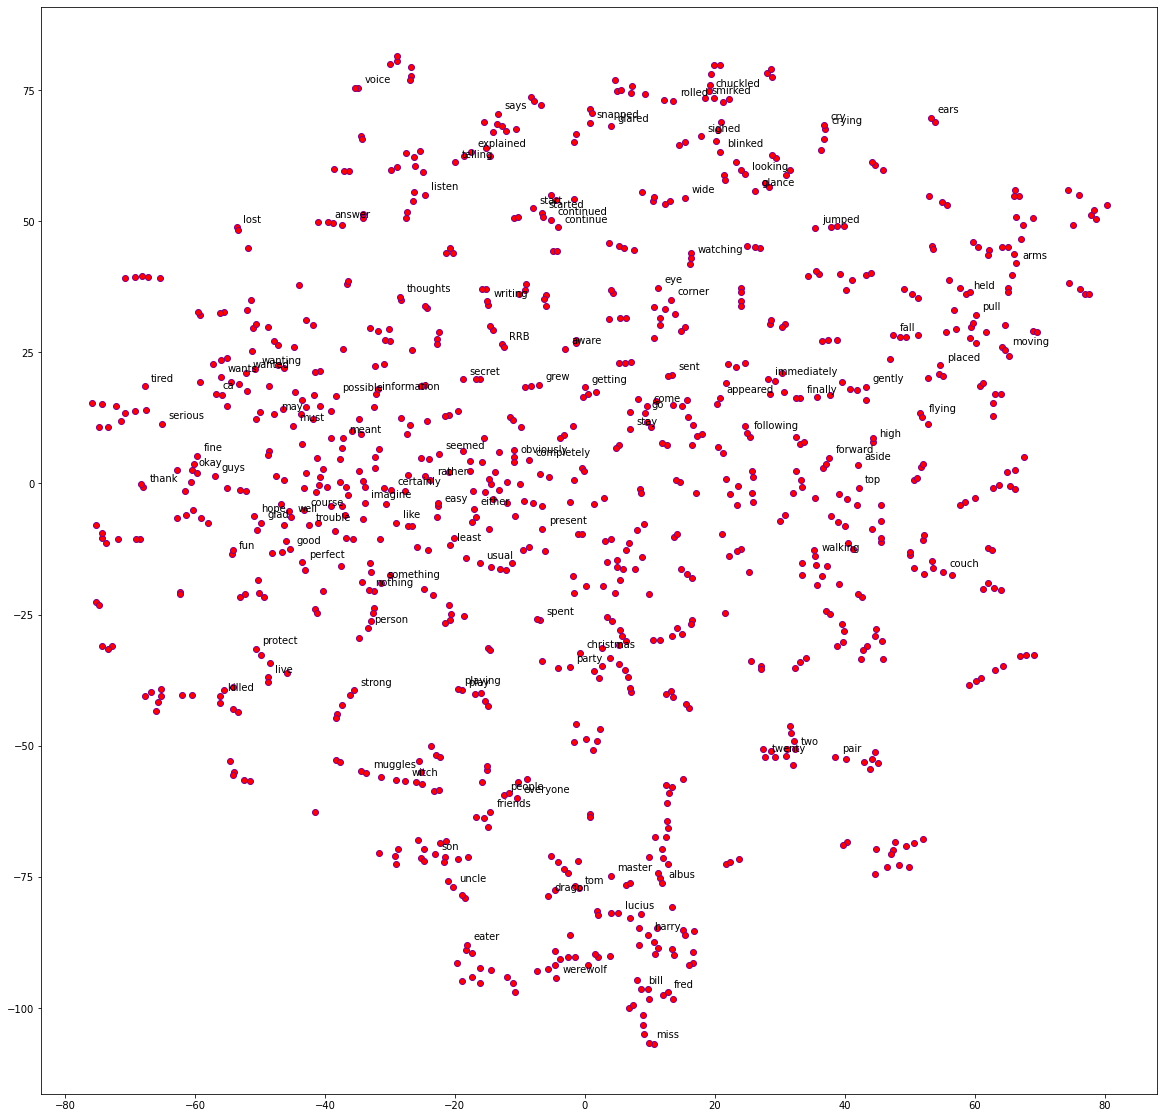

In [57]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 20))
plt.scatter(vectors[:, 0], vectors[:, 1], c='red', edgecolors='purple')

for i, (label, x, y) in enumerate(zip(labels, vectors[:, 0], vectors[:, 1])):
    if i % 8 == 0:
        plt.annotate(label, xy=(x + 1, y + 1), xytext=(0, 0), textcoords='offset points')
plt.show()

## Часть 3. [5 баллов] Классификация текстов
Задача классификации формулируется так: данный фрагмент фанфика описывают какую-то ситуацию, которая предшествует произнесению заклинания. Требуется по тексту предсказать, какое именно заклинание будет произнесено. Таким образом, заклинание - это фактически метка класса. Основная мера качества – macro $F_1$.
Обучите несколько классификаторов и сравните их между собой. Оцените качество классификаторов на частых и редких классах. Какие классы чаще всего оказываются перепутаны? Связаны ли ошибки со смыслом заклинаний?

Используйте фрагменты из множества train для обучения, из множества dev для отладки, из множества test – для тестирования и получения итоговых результатов. 

1. [1 балл] Используйте fastText в качестве baseline-классификатора.
2. [2 балла] Используйте сверточные  или реккурентные сети в качестве более продвинутого классификатора. Поэкспериментируйте с количеством и размерностью фильтров, используйте разные размеры окон, попробуйте использовать $k$-max pooling. 
3. [2 балла] Попробуйте расширить обучающее множество за счет аугментации данных. Если вам понадобится словарь синонимов, можно использовать WordNet (ниже вы найдете примеры).

[бонус] Используйте результат max pooling'а как эмбеддинг входного текста. Визуализируйте эмбеддинги 500-1000 предложений из обучающего множества и изучите свойства получившегося пространства.

[бонус] Используйте ваш любимый классификатор и любые (честные) способы повышения качества классификации и получите macro $F_1$ больше 0.5.

In [ ]:
import pandas as pd

train_df = pd.read_csv("hpac_corpus/hpac_training_128.tsv", sep="\t", header=None, names=["score", "spell", "sent"])
dev_df = pd.read_csv("hpac_corpus/hpac_dev_128.tsv", sep="\t", header=None, names=["score", "spell", "sent"])
test_df = pd.read_csv("hpac_corpus/hpac_test_128.tsv", sep="\t", header=None, names=["score", "spell", "sent"])


In [ ]:
from nltk.tokenize import RegexpTokenizer
from string import punctuation

def create_fasttext_dataset(df, dataset_type='train'):
    df["spell"] =  "__label__" + df["spell"]
    punct = set(list(punctuation) + ["``", "--", "n", "''", "..."])

    tokenizer = RegexpTokenizer(r"\w+")
    def preprocess_sent(s):
        tokens = tokenizer.tokenize(s)
        res = []
        for tok in tokens:
            if tok not in punct:
                res.append(tok)
        return " ".join(res)
    df["preprocess_sent"] = df["sent"].apply(preprocess_sent)
    with open(dataset_type+"_hpac.txt", "w") as f:
        for i, r in df[["spell", "preprocess_sent"]].iterrows():
            f.write(r[0] + " " + r[1]+"\n")
    

In [ ]:
create_fasttext_dataset(train_df, dataset_type="train")
create_fasttext_dataset(test_df, dataset_type="test")
create_fasttext_dataset(dev_df, dataset_type="dev")


In [ ]:
model = fasttext.train_supervised("train_hpac.txt", autotuneValidationFile="dev_hpac.txt")

In [ ]:
model.save_model("hpac_fasttext.bin")

In [124]:
model = fasttext.load_model("hpac_fasttext.bin")

In [127]:
n_samples, pr, rcl = model.test("test_hpac.txt")
print(f"Samples: {n_samples}, Presicion: {pr}, Recall:{rcl}")

Samples: 7679, Presicion: 0.24846985284542258, Recall:0.24846985284542258


Нормальный результат.

Обучение сеток в другом ноутбуке, просто так произошло 🥸


## Часть 4. [1 балл] Итоги
Напишите краткое резюме проделанной работы. Читали ли вы сами Гарри Поттера или фанфики о нем и помогло ли вам знание предметной области в выполнении домашнего задания?

    1. Посмотрели на словарик популярных слов. Никаких откровений для поттераманов, что Гарри на первом месте.
    2. Обучили векторные представления: никаких сомнений, что аналогии к Белле, Гермионе и сексу -- садомазо.
    3. Классификатор фасттекста настолько хорош, что он в проде в большой компании-маркетплейсе уже 6 лет. Спасибо, за то, что быстрый, не спасибо, за то, что нужно клеить весь датасет в один файл. Качество не блещет, но все еще не хуже чем нейронки.